In [5]:
import cobra
import pandas as pd
import numpy as np

In [7]:
model = cobra.io.read_sbml_model('../assets/models/stoich/iJO1366_b1761_NAD.xml')
media = pd.read_csv('../assets/media_sets_names.txt',sep='\t')

# get the base medium
medium = model.medium
medium.pop('EX_glc__D_e')
medium.pop('EX_nh4_e')
medium.pop('EX_o2_e')
medium_base = medium.copy()


In [8]:
csource = 'EX_ala__L_e'
nsource = 'EX_nh4_e'
esource = 'None'
m = medium_base.copy();
m[csource] = 100;
m[nsource] = 1000;
model.medium = m;
solution = model.optimize()


In [12]:
m2 = model.copy()

In [17]:
m2.reactions.get_by_id('NADTRHD').lower_bound = 0

In [18]:
m2.optimize()

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-3.183278e-01
EX_co2_e,-0.083772,0.000000e+00
EX_cobalt2_e,-0.000006,0.000000e+00
DM_4crsol_c,0.000051,0.000000e+00
...,...,...
RNDR4b,0.000000,-5.247161e-03
RNTR1c2,0.006000,-4.423545e-17
RNTR2c2,0.006195,3.903128e-17
RNTR3c2,0.006195,1.127570e-17


In [30]:
wt = cobra.io.read_sbml_model('../assets/iJO1366.xml')
# get the base medium
wt.medium = m

In [39]:
wt.medium = m

In [40]:
solwt = wt.optimize()

In [41]:
solwt

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-3.097169e-01
EX_co2_e,-92.518256,0.000000e+00
EX_cobalt2_e,-0.000012,0.000000e+00
DM_4crsol_c,0.000107,9.090506e-13
...,...,...
RNDR4,0.000000,0.000000e+00
RNDR4b,0.000000,0.000000e+00
RNTR1c2,0.012586,0.000000e+00
RNTR2c2,0.000000,5.551115e-17


In [66]:
model.reactions[-1]

Reaction identifier,GLUDy[mutant]
Name,Glutamate dehydrogenase (NADP)
Memory address,0x07f8b82af0b00
Stoichiometry,glu__L_c + h2o_c + nad_c <=> akg_c + h_c + nadh_c + nh4_c L-Glutamate + H2O H2O + Nicotinamide adenine dinucleotide <=> 2-Oxoglutarate + H+ + Nicotinamide adenine dinucleotide - reduced + Ammonium
GPR,b1761
Lower bound,-1000.0
Upper bound,1000.0


In [25]:
solution.shadow_prices.sort_values()

murein5p5p5p_p     -1.116019
murein5px4px4p_p   -1.108041
murein4px4p4p_p    -1.104051
murein4px4px4p_p   -1.104051
uaagmda_c          -0.822802
                      ...   
sufbcd_c            0.248337
udpLa4o_c           0.314493
udpglcur_c          0.318483
udpLa4n_c           0.321475
udpLa4fn_c          0.321475
Name: shadow_prices, Length: 1805, dtype: float64

In [55]:
solution.fluxes.loc['NADTRHD']

0.0

In [58]:
s = pd.DataFrame(solution.shadow_prices)
s.columns = ['Shadow prices (MUT)']

w = pd.DataFrame(solwt.shadow_prices)
w.columns = ['Shadow prices (WT)']


In [61]:
sp = pd.concat([s,w],axis=1)

In [62]:
import seaborn as sns

<AxesSubplot:xlabel='Shadow prices (WT)', ylabel='Shadow prices (MUT)'>

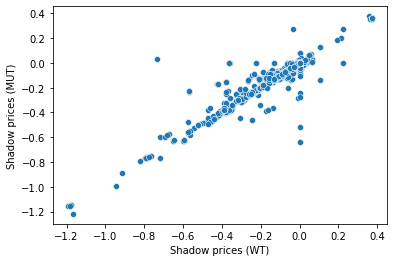

In [63]:
sns.scatterplot(x='Shadow prices (WT)',y = 'Shadow prices (MUT)', data=sp)

In [64]:
sp[(sp['Shadow prices (WT)'] > -0.1) & (sp['Shadow prices (MUT)'] < -0.4)]

,Shadow prices (MUT),Shadow prices (WT)
colipa_e,-0.514222,0.0
pheme_e,-0.638405,0.0
pheme_p,-0.638405,0.0


In [ ]:
s = pd.DataFrame(solution.fluxes)
s.columns = ['Fluxes (MUT)']

w = pd.DataFrame(solwt.fluxes)
w.columns = ['Fluxes (WT)']


In [77]:
solwt_pfba = cobra.flux_analysis.parsimonious.pfba(wt)
solmut_pfba = cobra.flux_analysis.parsimonious.pfba(model)

<AxesSubplot:xlabel='flux (wt)', ylabel='flux (mut)'>

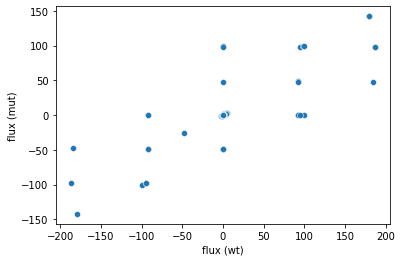

In [96]:
solwt_pfba_flx = pd.DataFrame(solwt_pfba.fluxes).fillna(0)
solwt_pfba_flx.columns = ['flux (wt)']

solmut_pfba_flx = pd.DataFrame(solmut_pfba.fluxes).fillna(0)
solmut_pfba_flx.columns = ['flux (mut)']

pfba_fluxes = pd.concat([solwt_pfba_flx,solmut_pfba_flx],axis=1).fillna(0)

sns.scatterplot(x='flux (wt)',y = 'flux (mut)', data=pfba_fluxes)


In [155]:
pfba_fluxes.loc[['GLUDy','GLUDy[mutant]','ALATA_L','FLDR2','PFL','ACALD','ACKr','ALCD2x','CO2tpp','POR5']]

,flux (wt),flux (mut)
GLUDy,94.861455,0.000000
GLUDy[mutant],0.000000,97.550380
ALATA_L,98.465406,99.268436
FLDR2,92.342528,0.000000
PFL,186.984204,97.445608
ACALD,0.000000,-48.174785
ACKr,-92.321156,-48.164597
ALCD2x,0.000000,-48.174785
CO2tpp,92.518256,0.083772
POR5,-92.290217,0.024938


In [97]:
(pfba_fluxes['flux (mut)'] - pfba_fluxes['flux (wt)']).sort_values().iloc[-20:-1]

ASAD              0.269088
GAPD              0.606035
ASPTA             0.736901
ALATA_L           0.803030
THD2pp            0.857040
PPK               0.881970
ENO               1.024758
EX_nh4_e          2.718583
ATPS4rpp         22.678637
EX_h2o_e         37.529876
ACKr             44.156559
ACt2rpp          44.303195
ACtex            44.303195
EX_etoh_e        48.174785
FORtex           89.511108
POR5             92.315154
EX_co2_e         92.434484
GLUDy[mutant]    97.550380
ALAt2pp_copy1    99.998806
dtype: float64

In [98]:
(pfba_fluxes['flux (mut)'] - pfba_fluxes['flux (wt)']).sort_values().iloc[0:20]

EX_h_e          -136.295988
ALAt2pp_copy2    -99.997496
GLUDy            -94.861455
CO2tpp           -92.434484
CO2tex           -92.434484
FLDR2            -92.342528
PFL              -89.538596
FORtppi          -89.511108
EX_for_e         -89.511108
ACALD            -48.174785
ETOHtrpp         -48.174785
ETOHtex          -48.174785
ALCD2x           -48.174785
EX_ac_e          -44.303195
PTAr             -44.156559
H2Otex           -37.529876
H2Otpp           -37.529876
ADK1              -2.722695
NH4tpp            -2.718583
NH4tex            -2.718583
dtype: float64

In [118]:
[x for x in model.reactions if x.id =='ACALD'][0]

Reaction identifier,ACALD
Name,Acetaldehyde dehydrogenase (acetylating)
Memory address,0x07f8b81410da0
Stoichiometry,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide <=> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,b0351 or b1241
Lower bound,-1000.0
Upper bound,1000.0


In [122]:
r = [x for x in model.reactions if x.id =='FLDR2'][0].copy()

In [132]:
r.metabolites[list([x for x in model.reactions if x.id =='GLUDy[mutant]'][0].metabolites)[2]] = 1

In [144]:


def swap_reaction(model,reaction_index,thermo):
    met = {}
    met['nad'] = np.where([x.id == 'nad_c' for x in model.metabolites])[0][0]
    met['nadp'] = np.where([x.id == 'nadp_c' for x in model.metabolites])[0][0]
    met['nadh'] = np.where([x.id == 'nadh_c' for x in model.metabolites])[0][0]
    met['nadph'] = np.where([x.id == 'nadph_c' for x in model.metabolites])[0][0]

    met_objs = {}
    met_objs['nad'] = [x for x in model.metabolites if x.id == 'nad_c'][0]
    met_objs['nadh'] = [x for x in model.metabolites if x.id == 'nadh_c'][0]
    met_objs['nadp'] = [x for x in model.metabolites if x.id == 'nadp_c'][0]
    met_objs['nadph'] = [x for x in model.metabolites if x.id == 'nadph_c'][0]
    
    rxn = model.reactions[reaction_index].copy()
    # make a new dictionary with coenzyme swapped
    v = {x:y for x,y in rxn.metabolites.items() if x.id in [x + '_c' for x in list(met)]}

    v2 = {}
    for x,y in v.items():
        if x.id == 'nadph_c':
            v2[met_objs['nadh']] = y
        elif x.id == 'nadp_c':
            v2[met_objs['nad']] = y
        elif x.id == 'nadh_c':
            v2[met_objs['nadph']] = y
        elif x.id == 'nad_c':
            v2[met_objs['nadp']] = y
            
    rxn.subtract_metabolites(v)
    rxn.add_metabolites(v2)
    rxn.id = rxn.id + '[mutant]'
    if thermo == 'irreversible (forward)':
        rxn.lower_bound = 0;rxn.upper_bound = 1000;
    elif thermo == 'irreversible (backward)':
        rxn.lower_bound = -1000;rxn.upper_bound = 0;
    elif thermo == 'reversible':
        rxn.lower_bound = -1000;rxn.upper_bound = 1000;
    
        
    model.remove_reactions(model.reactions[reaction_index])
    model.add_reaction(rxn)
    return model

In [138]:
m2 = model.copy()

In [141]:
np.where([x.id == 'FLDR2' for x in model.reactions])

(array([1121]),)

In [142]:
 model.reactions[1121]

Reaction identifier,FLDR2
Name,Flavodoxin reductase (NADPH)
Memory address,0x07f8b81b386a0
Stoichiometry,2.0 flxso_c + nadph_c --> 2.0 flxr_c + h_c + nadp_c 2.0 Flavodoxin semi oxidized + Nicotinamide adenine dinucleotide phosphate - reduced --> 2.0 Flavodoxin reduced + H+ + Nicotinamide adenine dinucleotide phosphate
GPR,( b0684 and b3924 ) or ( b2895 and b3924 )
Lower bound,0.0
Upper bound,1000.0


In [145]:
m2 = swap_reaction(m2,1121,'irreversible (forward)')

/Users/joshuagoldford/opt/miniconda3/envs/informatics3/lib/python3.6/site-packages/cobra/core/model.py:745: UserWarning: need to pass in a list
  warn("need to pass in a list")


In [149]:
m2.medium

{'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_ala__L_e': 100,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_ni2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0}

In [156]:
rescuegr = m2.slim_optimize()
wtgr = wt.slim_optimize()
mutgr = model.slim_optimize()


In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

        
plt.rcParams.update({
    "font.size": 10,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"]})

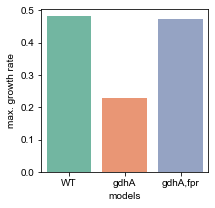

In [188]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(y=[wtgr,mutgr,rescuegr],x=['WT','gdhA','gdhA,fpr'],palette='Set2',ax=ax)
plt.xlabel('models')
plt.ylabel('max. growth rate')
plt.savefig('gdh.fpr.svg')

In [183]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f8b9481ff28>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variab

In [172]:
help(sns)

Help on package seaborn:

NAME
    seaborn - # Import seaborn objects

PACKAGE CONTENTS
    _core
    _decorators
    _docstrings
    _statistics
    _testing
    algorithms
    apionly
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    linearmodels
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    timeseries
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.11.1

FILE
    /Users/joshuagoldford/opt/miniconda3/envs/informatics3/lib/python3.6/site-packages/seaborn/__init__.py


